# **Kelompok 2 Machine Learning**

> Asep Jamaludin - 101012330125

> Syahril Arfian Almazril - 103032300013

> Ridho Anugrah Mulyadi- 101032300028

> Sayyid Faqih - 101012330200

# Install dan Import Depedencies

***Import Library Yang Akan Digunakan***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

***Membaca, Mengelola Dan Memvisualisasikan Data***

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
file_path = "/content/drive/MyDrive/Colab Notebooks/milknew.csv"
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***data.head() digunakan agar melihat sejumlah data teratas***

In [ ]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


***Melihat informasi dasar data dan menjelaskannya dengan data.describe()***

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


***Mencari data kosong dan mencari jumlahnya***

In [ ]:
data.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [ ]:
print("\nDistribusi Grade Susu:")
print(data['Grade'].value_counts())


Distribusi Grade Susu:
Grade
low       429
medium    374
high      256
Name: count, dtype: int64


***Disini kita dapat melihat bahwa outlier dari pH, Temprature dan Colour itu relatif rendah sehingga kemungkinan anomali data sangat minim.***

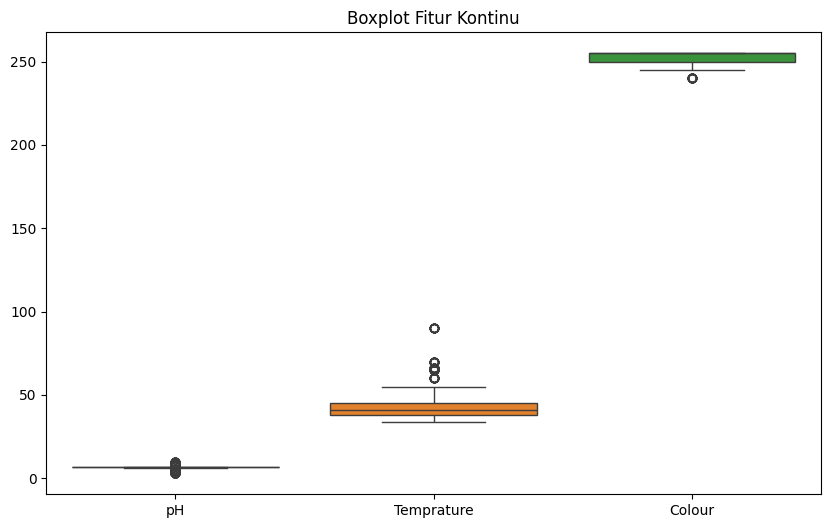

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['pH', 'Temprature', 'Colour']])
plt.title("Boxplot Fitur Kontinu")
plt.show()

***Dari sini kita dapatkan grade susu dari berbagai data, dapat dilihat juga banyak grade susu yang low dari data.***

<ipython-input-11-0ff6134a4c9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grade', data=data, palette='viridis')


Text(0, 0.5, 'Jumlah')

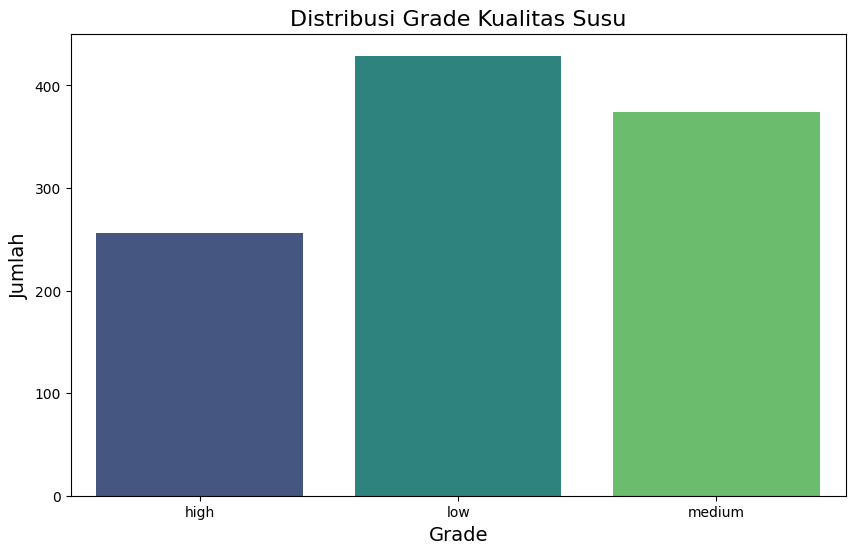

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Grade', data=data, palette='viridis')
plt.title('Distribusi Grade Kualitas Susu', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

***Disini kita juga dapatkan dari plot distribusi histogram, bahwa mayoritas dari data grade susu memiliki karakteristik yang khusus dengan pH tertenut, temprature tertentu dan juga warna susu yang khusus.***

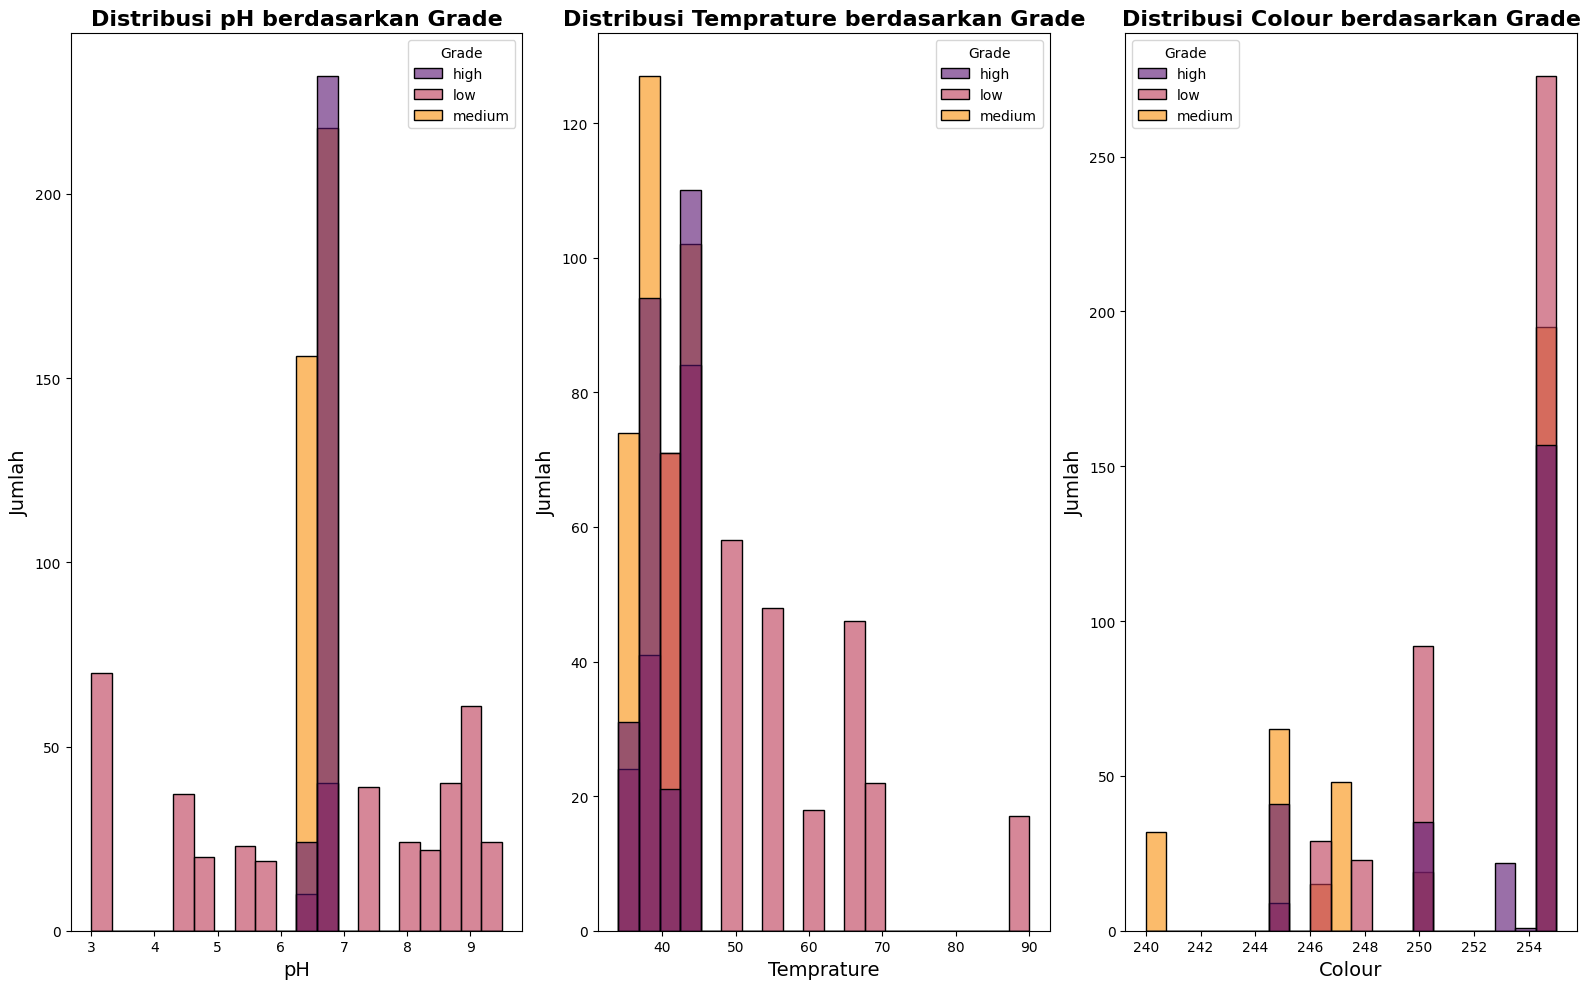

In [ ]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(['pH', 'Temprature', 'Colour']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=data, x=column, hue='Grade', kde=False, palette='inferno',
                 bins=20, stat='count', alpha=0.6)
    plt.title(f'Distribusi {column} berdasarkan Grade', fontsize=16, weight='bold')
    plt.xlabel(f'{column}', fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)
plt.tight_layout()
plt.savefig('distribusi_variabel_kontinu.png', dpi=300)
plt.show()

***Selanjutnya kita membuat plot distribusi berdasarkan rasa, odor, fat dan turbidity dan mencari tahu grade dari data. (1 merepresentasikan iya dan 0 tidak)***

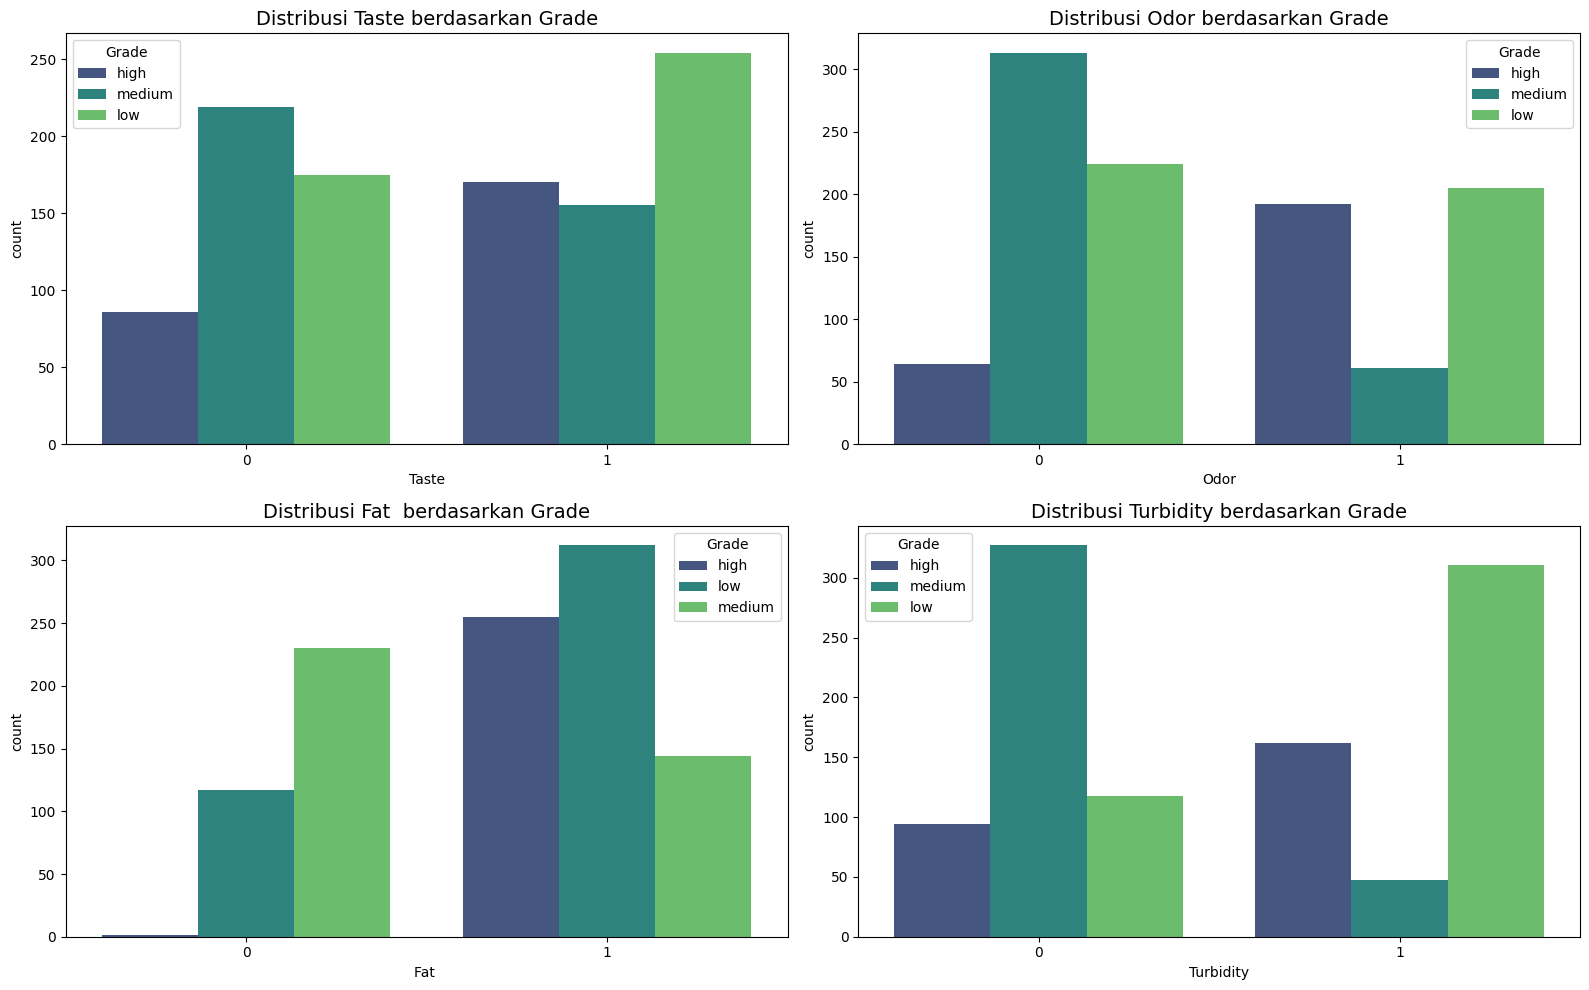

In [ ]:
plt.figure(figsize=(16, 10))
binary_vars = ['Taste', 'Odor', 'Fat ', 'Turbidity']
for i, column in enumerate(binary_vars):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=column, hue='Grade', data=data, palette='viridis')
    plt.title(f'Distribusi {column} berdasarkan Grade', fontsize=14)
plt.tight_layout()
plt.savefig('distribusi_variabel_biner.png')
plt.show()

***Dari matriks korelasi kita dapatkan bahwa:***

Warna merah berarti korelasi positif (semakin satu naik, yang lain juga naik).

Warna biru berarti korelasi negatif (semakin satu naik, yang lain turun).

Angka antara -1 hingga 1 menunjukkan seberapa kuat hubungan:

1.0 -> Korelasi sempurna positif.

-1.0 -> Korelasi sempurna negatif.

0 -> Tidak ada korelasi.

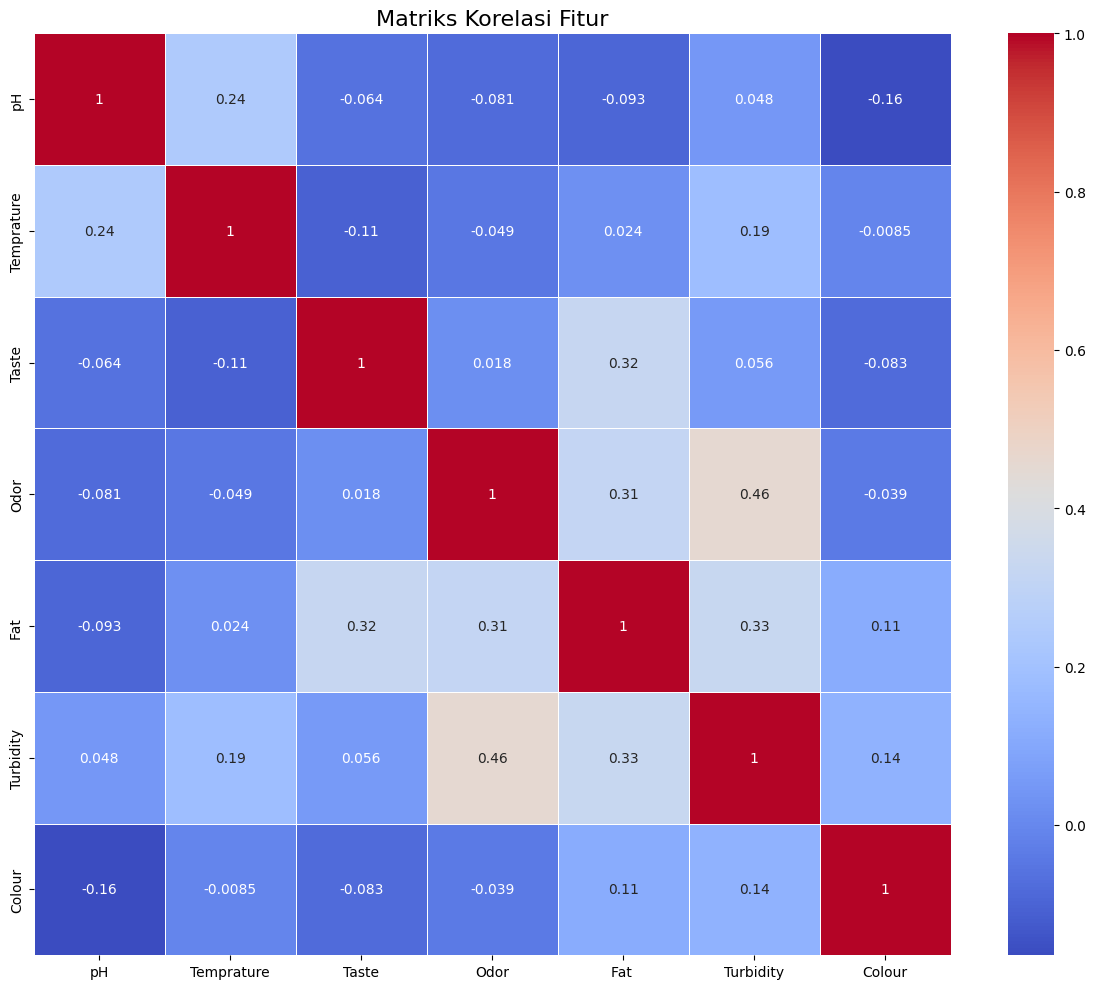

In [ ]:
numeric_data = data.select_dtypes(include=['number']) # Hanya data numerik
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_data.corr() # korelasi pearson
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur', fontsize=16)
plt.tight_layout()
plt.savefig('matriks_korelasi.png')
plt.show()

***Data Traning Dan Data Testing***

In [ ]:
X = data.drop('Grade', axis=1) # Menghilangkan label grade
y = data['Grade'] # Buat hanya Grade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler() #untuk normalisasi data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("\nBentuk set pelatihan:", X_train.shape)
print("Bentuk set pengujian:", X_test.shape)


Bentuk set pelatihan: (741, 7)
Bentuk set pengujian: (318, 7)


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

Grade
low       300
medium    262
high      179
Name: count, dtype: int64
Grade
low       129
medium    112
high       77
Name: count, dtype: int64


In [ ]:
smote = SMOTE(random_state=42) # balacing menggunakan SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print("\nDistribusi setelah SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


Distribusi setelah SMOTE:
Grade
low       300
medium    300
high      300
Name: count, dtype: int64


In [ ]:
print("\nBentuk set pelatihan setelah SMOTE:", X_train_balanced.shape)


Bentuk set pelatihan setelah SMOTE: (900, 7)


<ipython-input-21-ff0bde62e0c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_balanced, palette='viridis')


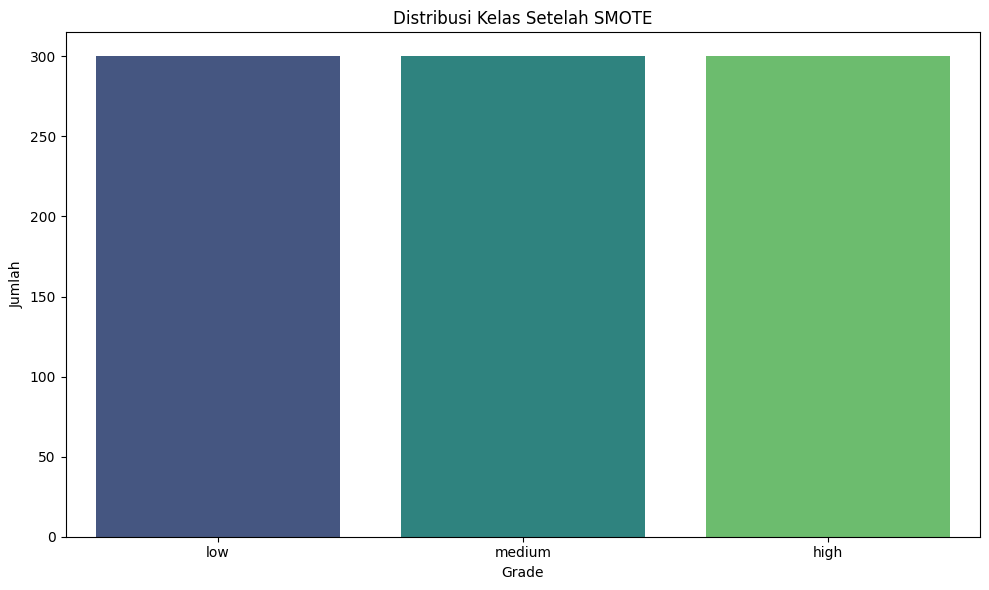

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_balanced, palette='viridis')
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("Grade")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.savefig("distribusi_setelah_smote.png")
plt.show()

In [ ]:
svm_classifier = SVC(kernel='rbf', random_state=42, probability=True)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

svm_classifier.fit(X_train_balanced, y_train_balanced)
knn_classifier.fit(X_train_balanced, y_train_balanced)
nb_classifier.fit(X_train_balanced, y_train_balanced)

svm_predictions = svm_classifier.predict(X_test_scaled)
knn_predictions = knn_classifier.predict(X_test_scaled)
nb_predictions = nb_classifier.predict(X_test_scaled)

***Evaluasi Model***

In [ ]:
def evaluasi_model(y_true, y_pred, nama_model):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n--- Metrik Evaluasi {nama_model} ---")
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Presisi: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_true, y_pred))
    return [accuracy, precision, recall, f1]

# Proses Penghitungan pada Metrik Evaluasi
# Akurasi = (TP+TN)/Total
# Presisi = TP/(TP+FP)
# Recall = TP/(TP+FN)
# F1-Score = 2 x (Precision x Recall)/(Precision + Recall)

In [ ]:
print("\n=== Evaluasi pada Data Uji ===")
svm_metrics = evaluasi_model(y_test, svm_predictions, "SVM (Test)")
knn_metrics = evaluasi_model(y_test, knn_predictions, "KNN (Test)")
nb_metrics = evaluasi_model(y_test, nb_predictions, "Naive Bayes (Test)")


=== Evaluasi pada Data Uji ===

--- Metrik Evaluasi SVM (Test) ---
Akurasi: 0.9214
Presisi: 0.9275
Recall: 0.9214
F1-Score: 0.9222

Laporan Klasifikasi:
              precision    recall  f1-score   support

        high       0.84      0.99      0.90        77
         low       1.00      0.92      0.96       129
      medium       0.91      0.88      0.89       112

    accuracy                           0.92       318
   macro avg       0.91      0.93      0.92       318
weighted avg       0.93      0.92      0.92       318


--- Metrik Evaluasi KNN (Test) ---
Akurasi: 0.9969
Presisi: 0.9969
Recall: 0.9969
F1-Score: 0.9969

Laporan Klasifikasi:
              precision    recall  f1-score   support

        high       0.99      1.00      0.99        77
         low       1.00      0.99      1.00       129
      medium       1.00      1.00      1.00       112

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg     

In [ ]:
print("\n=== Evaluasi pada Data Latih (Setelah SMOTE) ===")
svm_train_preds = svm_classifier.predict(X_train_balanced)
knn_train_preds = knn_classifier.predict(X_train_balanced)
nb_train_preds = nb_classifier.predict(X_train_balanced)

evaluasi_model(y_train_balanced, svm_train_preds, "SVM (Train)")
evaluasi_model(y_train_balanced, knn_train_preds, "KNN (Train)")
evaluasi_model(y_train_balanced, nb_train_preds, "Naive Bayes (Train)")



=== Evaluasi pada Data Latih (Setelah SMOTE) ===

--- Metrik Evaluasi SVM (Train) ---
Akurasi: 0.9456
Presisi: 0.9493
Recall: 0.9456
F1-Score: 0.9457

Laporan Klasifikasi:
              precision    recall  f1-score   support

        high       0.89      1.00      0.94       300
         low       1.00      0.93      0.97       300
      medium       0.96      0.90      0.93       300

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


--- Metrik Evaluasi KNN (Train) ---
Akurasi: 0.9956
Presisi: 0.9956
Recall: 0.9956
F1-Score: 0.9956

Laporan Klasifikasi:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       300
         low       0.99      0.99      0.99       300
      medium       1.00      0.99      0.99       300

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       9

[0.8411111111111111,
 0.8848613207394063,
 0.8411111111111111,
 0.8388448801157176]

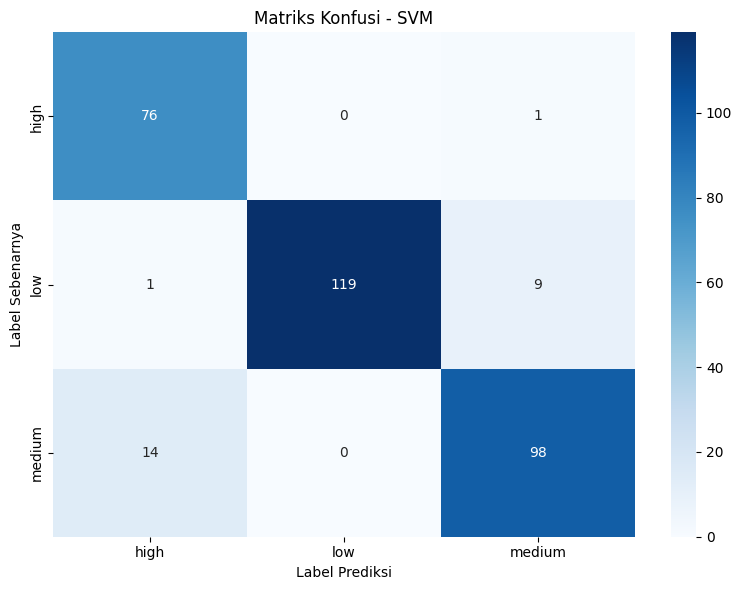

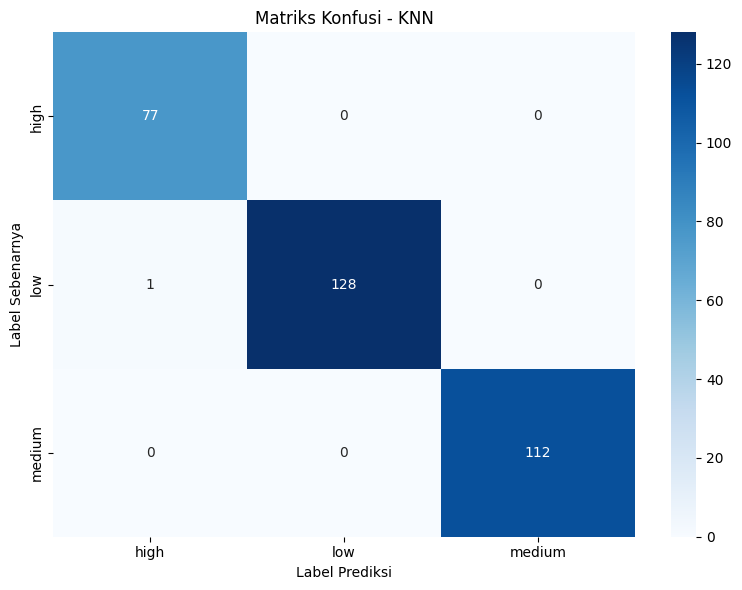

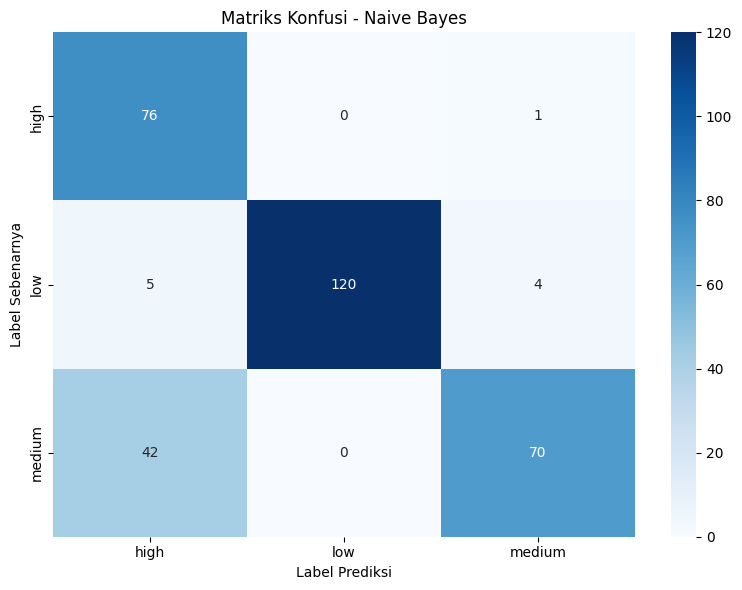

In [ ]:
def plot_matriks_konfusi(y_true, y_pred, nama_model):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Label Prediksi')
    plt.ylabel('Label Sebenarnya')
    plt.title(f'Matriks Konfusi - {nama_model}')
    plt.tight_layout()
    plt.savefig(f'matriks_konfusi_{nama_model.lower().replace(" ", "_")}.png')
    plt.show()

plot_matriks_konfusi(y_test, svm_predictions, "SVM")
plot_matriks_konfusi(y_test, knn_predictions, "KNN")
plot_matriks_konfusi(y_test, nb_predictions, "Naive Bayes")

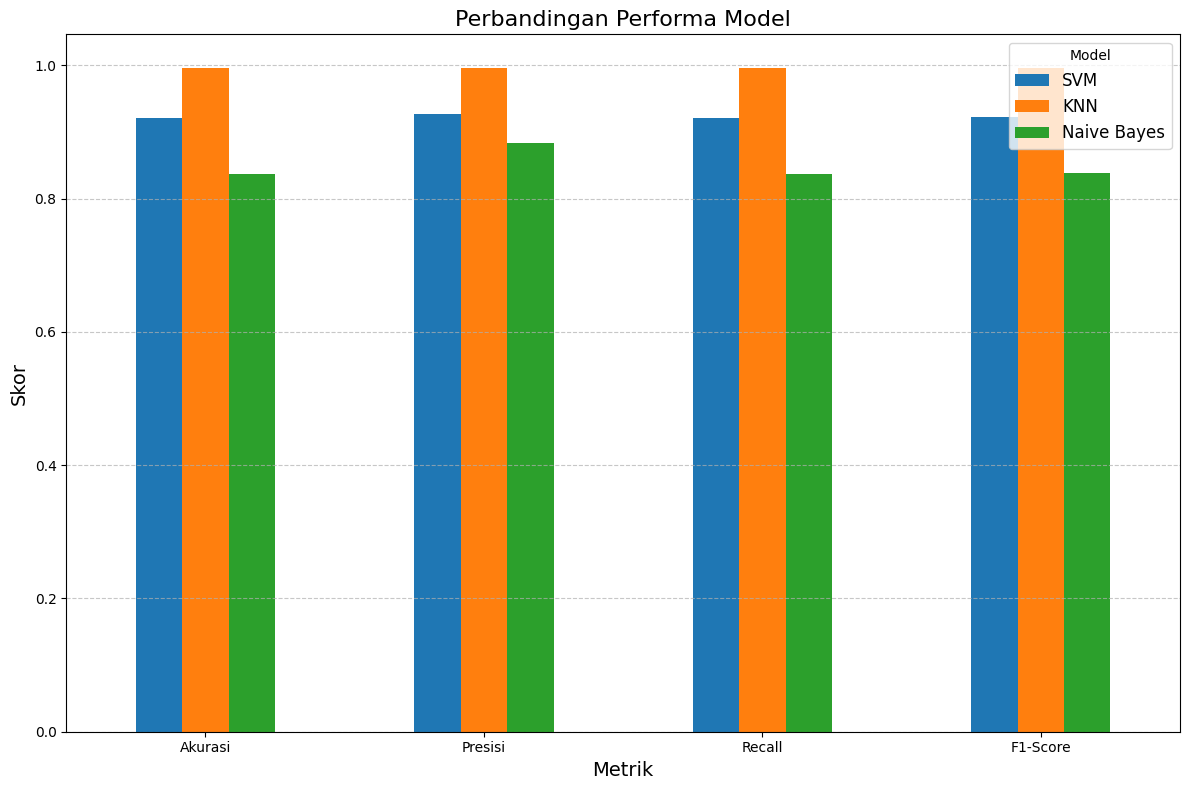

In [ ]:
models = ['SVM', 'KNN', 'Naive Bayes']
metrics = ['Akurasi', 'Presisi', 'Recall', 'F1-Score']
performance_df = pd.DataFrame({
    'SVM': svm_metrics,
    'KNN': knn_metrics,
    'Naive Bayes': nb_metrics
}, index=metrics)

performance_df.plot(kind='bar', figsize=(12, 8), rot=0)
plt.title('Perbandingan Performa Model', fontsize=16)
plt.ylabel('Skor', fontsize=14)
plt.xlabel('Metrik', fontsize=14)
plt.legend(title='Model', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('perbandingan_performa_model.png')
plt.show()

In [ ]:
performance_df.head()

,SVM,KNN,Naive Bayes
Akurasi,0.921384,0.996855,0.836478
Presisi,0.927476,0.996896,0.883996
Recall,0.921384,0.996855,0.836478
F1-Score,0.922160,0.996859,0.838703


In [ ]:
def prepare_plot_data(classifier, X_data, y_data):
    X_scaled = StandardScaler().fit_transform(X_data)
    classifier.fit(X_scaled, y_data)

    # Membuat meshgrid untuk visualisasi decision boundary
    h = 0.02
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Prediksi seluruh titik dalam meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Z berupa angka
    if not np.issubdtype(Z.dtype, np.number):
        Z = LabelEncoder().fit_transform(Z.ravel())
    Z = Z.reshape(xx.shape)

    # Encode target labels
    y_encoded = LabelEncoder().fit_transform(y_data)

    return X_scaled, y_encoded, xx, yy, Z


In [ ]:
def plot_decision_boundary(X_scaled, y_encoded, xx, yy, Z, feature_names, classifier_name):
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded,
                          s=50, edgecolors='k', cmap='viridis')
    plt.legend(*scatter.legend_elements(), title="Grade")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'Decision Boundary - {classifier_name}')
    plt.tight_layout()
    plt.savefig(f'decision_boundary_{classifier_name.lower().replace(" ", "_")}.png')
    plt.show()

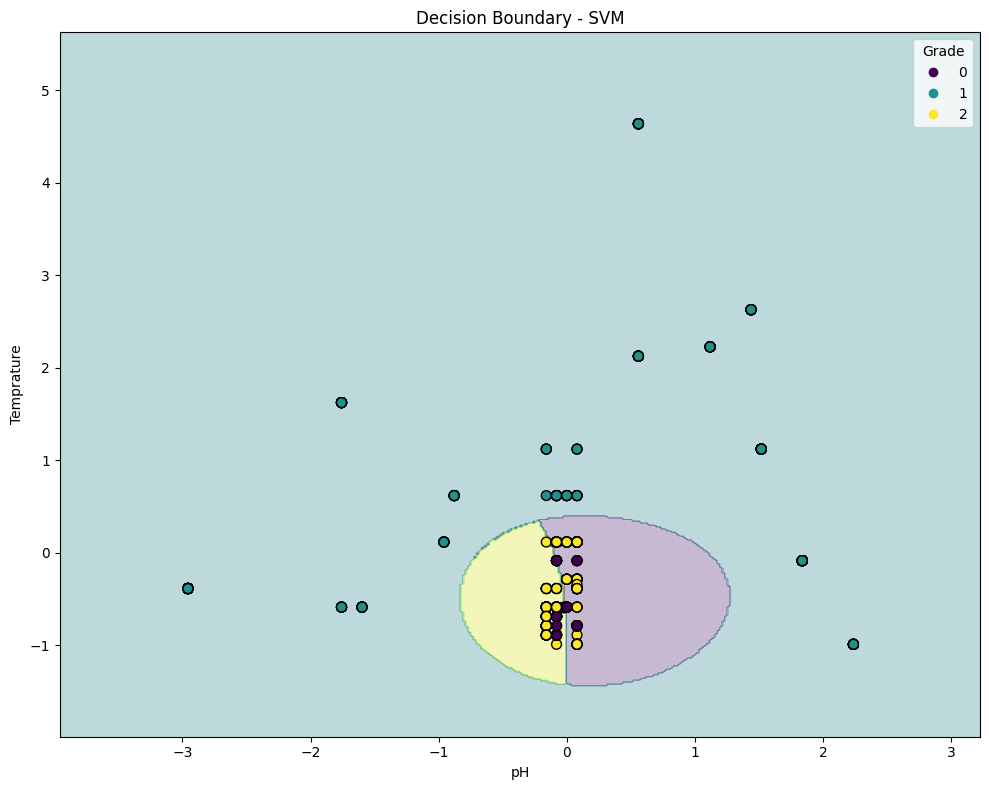

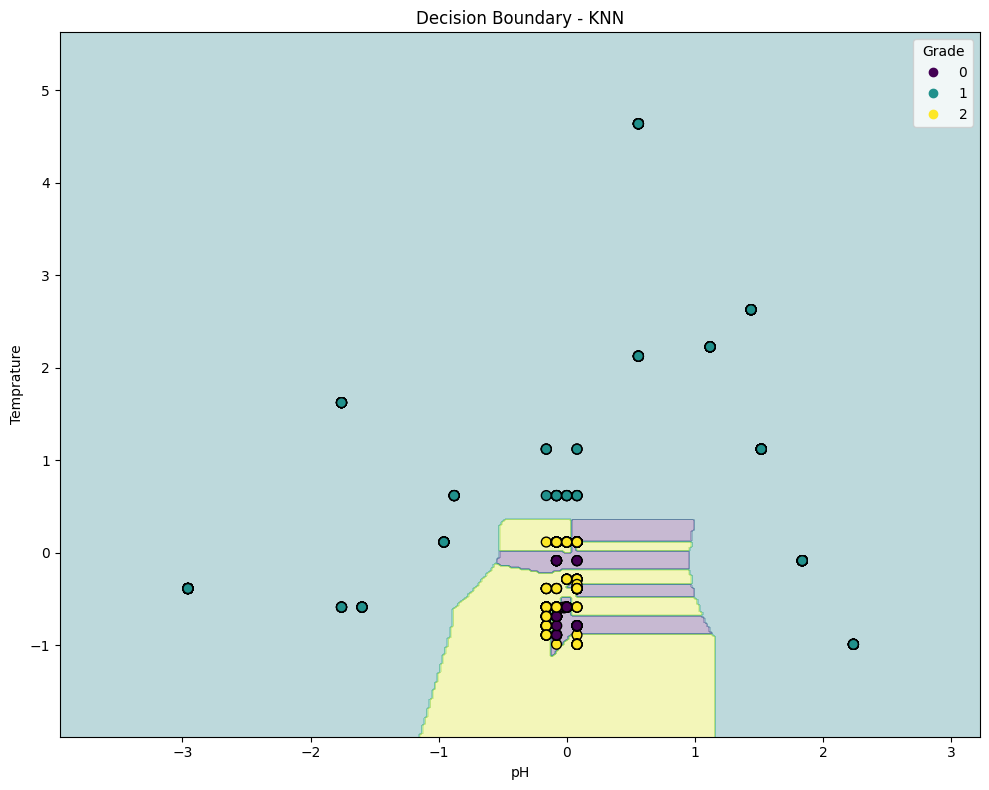

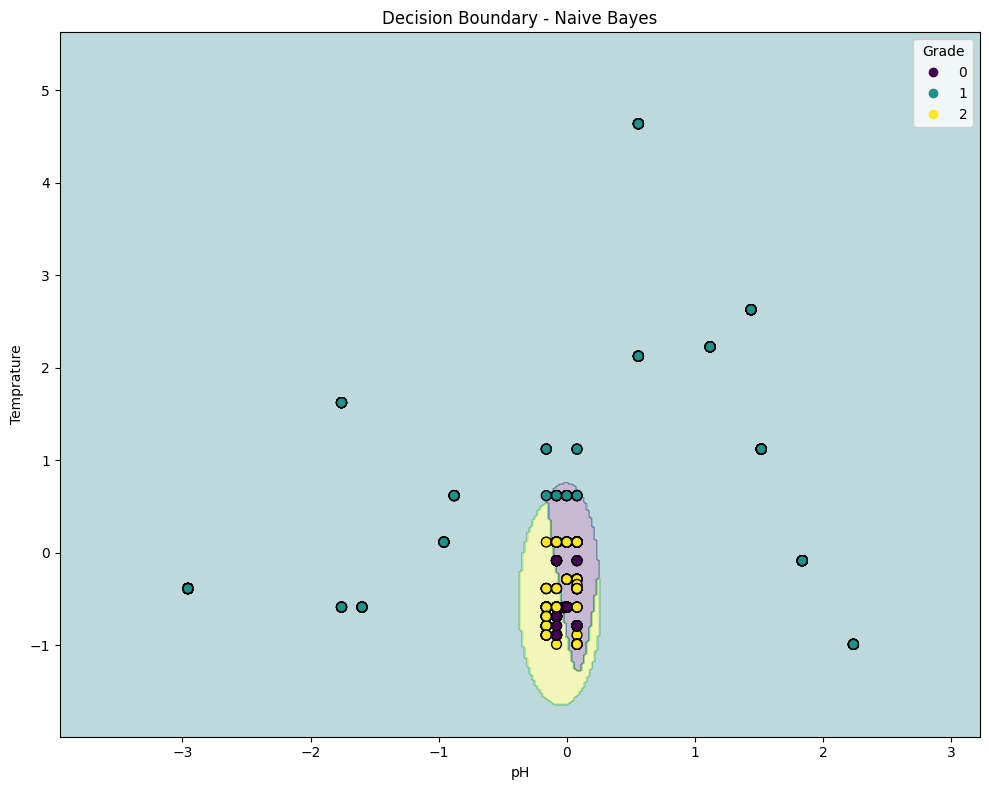

In [ ]:
X_train_subset = X_train_balanced[:, :2]
feature_name_1 = X.columns[0]
feature_name_2 = X.columns[1]

for model, name in [(SVC(), "SVM"), (KNeighborsClassifier(), "KNN"), (GaussianNB(), "Naive Bayes")]:
    X_scaled, y_encoded, xx, yy, Z = prepare_plot_data(model, X_train_subset, y_train_balanced)
    plot_decision_boundary(X_scaled, y_encoded, xx, yy, Z, [feature_name_1, feature_name_2], name)

In [ ]:
print("\n=== Ringkasan Proyek Klasifikasi Kualitas Susu ===")
print("\nKami menganalisis dataset kualitas susu dengan fitur berikut:")
for col in data.columns:
    if col != 'Grade':
        print(f"- {col}")

print("\nKami melatih tiga model klasifikasi:")
for model, metrics in zip(models, [svm_metrics, knn_metrics, nb_metrics]):
    print(f"- {model}: Akurasi = {metrics[0]:.4f}, F1-Score = {metrics[3]:.4f}")

best_model_idx = np.argmax([m[0] for m in [svm_metrics, knn_metrics, nb_metrics]])
best_model = models[best_model_idx]
print(f"\nModel dengan performa terbaik adalah {best_model} dengan akurasi {[svm_metrics, knn_metrics, nb_metrics][best_model_idx][0]:.4f}")

print("\nTemuan utama:")
print("1. Dataset berisi tiga kategori grade: high (tinggi), medium (sedang), dan low (rendah)")
print("2. Suhu dan pH adalah faktor penting dalam menentukan kualitas susu")
print("3. Model-model tersebut mampu mengklasifikasikan kualitas susu dengan akurasi yang baik")


=== Ringkasan Proyek Klasifikasi Kualitas Susu ===

Kami menganalisis dataset kualitas susu dengan fitur berikut:
- pH
- Temprature
- Taste
- Odor
- Fat 
- Turbidity
- Colour

Kami melatih tiga model klasifikasi:
- SVM: Akurasi = 0.9214, F1-Score = 0.9222
- KNN: Akurasi = 0.9969, F1-Score = 0.9969
- Naive Bayes: Akurasi = 0.8365, F1-Score = 0.8387

Model dengan performa terbaik adalah KNN dengan akurasi 0.9969

Temuan utama:
1. Dataset berisi tiga kategori grade: high (tinggi), medium (sedang), dan low (rendah)
2. Suhu dan pH adalah faktor penting dalam menentukan kualitas susu
3. Model-model tersebut mampu mengklasifikasikan kualitas susu dengan akurasi yang baik
